In [0]:
!echo "deb http://downloads.skewed.de/apt/bionic bionic universe" >> /etc/apt/sources.list
!apt-key adv --keyserver pgp.skewed.de --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool

[13, 22, 27, 33, 38, 45, 49, 57, 64, 65, 67, 69, 70, 71, 73, 76, 81, 86, 90, 97, 100]
[90]
[21, 22, 27, 28, 31, 33, 35, 36, 47, 49, 50, 52, 56, 57, 64, 65, 67, 68, 69, 70, 73, 74, 75, 81, 84, 86, 90, 97, 100]
95.23809523809523 23.809523809523807


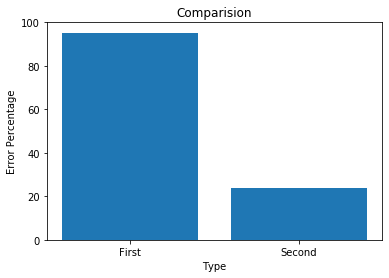

X=[1, 3, 2, 1, 1, 0, 1, 1, 1, 1, 4, 2, 5, 1, 3, 2, 2, 3, 1, 1], Predicted=1, Actual=1
X=[0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 3, 2, 0, 1, 2, 0, 0, 0, 1], Predicted=0, Actual=0
X=[0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2], Predicted=0, Actual=0
X=[1, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 0, 2, 0], Predicted=0, Actual=0
X=[0, 1, 3, 0, 1, 2, 1, 0, 4, 4, 0, 2, 4, 3, 0, 0, 2, 3, 1, 1], Predicted=1, Actual=1
X=[0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2], Predicted=0, Actual=0
X=[2, 2, 3, 1, 2, 1, 1, 0, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2], Predicted=0, Actual=0
X=[0, 1, 3, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0], Predicted=0, Actual=0
X=[2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0], Predicted=0, Actual=0
X=[1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 0, 1], Predicted=0, Actual=0
X=[2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0], Predicted=0, Actual=0
X=[3, 2, 4, 1, 4, 5, 4, 0, 3, 3, 2, 1, 3, 4, 0, 6, 6, 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
import csv
import networkx as nximport 
import collections
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

#Taking input from a csv file
def read_csv_file(file_name):
	with open(file_name, newline='') as csvfile:
	    data = list(csv.reader(csvfile))

	data = sorted(data,key = lambda x: int(x[0]))

	return data

# Compressing all nodes from string to int
def compressed_dictionaty(data,upto_tim):
	dit = {}
	compress = 0

	for x in data:
		if(int(x[0])>upto_tim):
			break

		# Trying compressing one end of edge
		st = x[1]
		if st in dit:
			pass
		else:
			dit[st] = compress
			compress = compress + 1
	
		# Trying compressing other end of edge
		st = x[2]
		if st in dit:
			continue
		else:
			dit[st] = compress
			compress = compress + 1

	return dit

def plot_graph(G):
	nx.draw(G, with_labels=True, font_weight='bold')
	plt.show()

#Upto how much time stamp
upto_tim = 100

# Initialising a Graph
G = nx.DiGraph()

# Initialising a deque
de = collections.deque([0,0])

# Setting a minimum checking value for the 
mini_check = 0.05

# Reading CSV File
data = read_csv_file('input.csv')

# Compressing string to int
dit = compressed_dictionaty(data,upto_tim)

def getting_warning_list(p=0.5,q=0.33,k=3):

	graph_no_list = []
	Gk = [0]*k

	#creating dequeue
	de = [0]*k

	#Setting number of previous dependents
	prev_dependents = 3

	for i in range(k):
		temp_lis = [0]*prev_dependents
		de[i] = collections.deque(temp_lis)

	# Adding all nodes to the graph Plotting
	for x in dit:
		G.add_node(dit[x])

	n = len(G)

	# Chosing source node list and destination list and creating K random graph
	sizes = [0]*k
	for i in range(k):
		Gk[i] = []
		source = [0]*n
		dest = [0]*n
		for x in G:
			y = np.random.binomial(1, p)
			if(y):
				source[x] = 1
			y = np.random.binomial(1, q)
			if(y):
				dest[x] = 1
			Gk[i]=[source, dest]

		for nodes in G:
			if(source[nodes] or dest[nodes]):
				sizes[i] = sizes[i] + 1

	prev = 0
	sum = 0
	sz = len(dit)

	def mean_sq_error(de):
		mean_sq = 0

		for itr in de:
			mean_sq = mean_sq + (rat - itr)*(rat - itr)

		mean_sq = math.sqrt(mean_sq)

		if(mean_sq >= mini_check*sizes[i]):
			return 1
			
		return 0

	def mean_ab_error(de):
		mean_ab = 0

		for itr in de:
			mean_sq = mean_ab + abs(rat - itr)

		if(mean_sq >= mini_check*sizes[i]):
			return 1
			
		return 0

	X = []
	Y = []

	for x in data:

		if(int(x[0])>upto_tim):
			break

		# Taking 2 points connected by an edge
		u = dit[x[1]]
		v = dit[x[2]]
		
		sum = sum + 1
		G.add_weighted_edges_from([(u,v,1)])
		
		# Adding all nodes of same timestamp
		if(int(x[0]) == prev):
			continue

		prev = int(x[0])

		flag = 0

		error_list = [0]*k
	  
		XX = []

		for i in range(k):

			if(sizes[i] == 0):
				continue

			source = Gk[i][0]
			dest = Gk[i][1]
			score = 0

			# Making new subgraph
			g = nx.DiGraph()

			# Adding nodes in the graph
			for nodes in G:
				if(source[nodes] or dest[nodes]):
					g.add_node(nodes)

			# Creating subgraphs
			for e in G.edges():
				uu = e[0] 
				vv = e[1]
				if(source[uu] and dest[vv]):
					g.add_weighted_edges_from([(uu,vv,1)])
					score += 1

			XX += [score]
			rat = score

			if(mean_sq_error(de[i])):
				flag = 1

			error_list[i] = rat

		X.append(XX)
		Y.append(flag)
		# plot_graph(G)

		if(flag):
			# print("Warning")
			graph_no_list.append(int(x[0]))
			# print(error_list)
		else:
			for i in range(k):
				de[i].append(error_list[i])
				de[i].popleft()
		
		# print(de)
		
		G.clear()

		for x in dit:
			G.add_node(dit[x])

	return X, Y, graph_no_list

X, Y, original_error_list = getting_warning_list(1,1,1)
print(original_error_list)

X, Y, get_other_list1 = getting_warning_list(0.5,0.33,1)
print(get_other_list1)

X, Y, get_other_list2 = getting_warning_list(0.5,0.33,20)
print(get_other_list2)

error1 = 0
for i in original_error_list:
	if(get_other_list1.count(i) == 0):
		error1 = error1 + 1

error2 = 0
for i in original_error_list:
	if(get_other_list2.count(i) == 0):
		error2 = error2 + 1

error1 = error1/len(original_error_list) * 100.00
error2 = error2/len(original_error_list) * 100.00

print(error1,error2)
label = ['First','Second']
index = np.arange(len(label))
plt.bar([0,1], [error1,error2])
plt.xlabel('Type')
plt.ylabel('Error Percentage')
plt.xticks(index, label)
plt.title('Comparision')
plt.show()

# Applying Regression Model to predict the error

from sklearn.linear_model import LogisticRegression
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics

# Training data for Regression Model
# 80% for training and 20% for testing

train_x = X[:80]
train_y = Y[:80]

# Testing data
test_x = X[80:]
test_y = Y[80:]

# # pick some random from given
# import random
# for i in range(10):
# 	j = random.randint(0,len(X))
# 	test_x.append(X[j])
# 	test_y.append(Y[j])


# fit final model
model = LogisticRegression()
model.fit(train_x, train_y)

# make predictions
predicted = model.predict(test_x)
# show the inputs and predicted outputs
for i in range(len(test_x)):
	print("X=%s, Predicted=%s, Actual=%s" % (test_x[i], predicted[i], test_y[i]))
 
print("Accuracy:",metrics.accuracy_score(test_y, predicted))
print("Precision:",metrics.precision_score(test_y, predicted))